### ** 해석과 판단의 이유를 모두 상세하게 적어주세요 **


In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:


plt.style.use('seaborn')
plt.rc('axes', unicode_minus=False)

import matplotlib.font_manager as fm
font_path = r'/content/NanumBarunGothicBold.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)




# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [3]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#결측치 체크
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
data.shape

(6019, 14)

#Target Data Distribution<br>
Target Data = `Price`

`Price` 변수 값이 상당히 한 쪽으로 치우쳐 있음

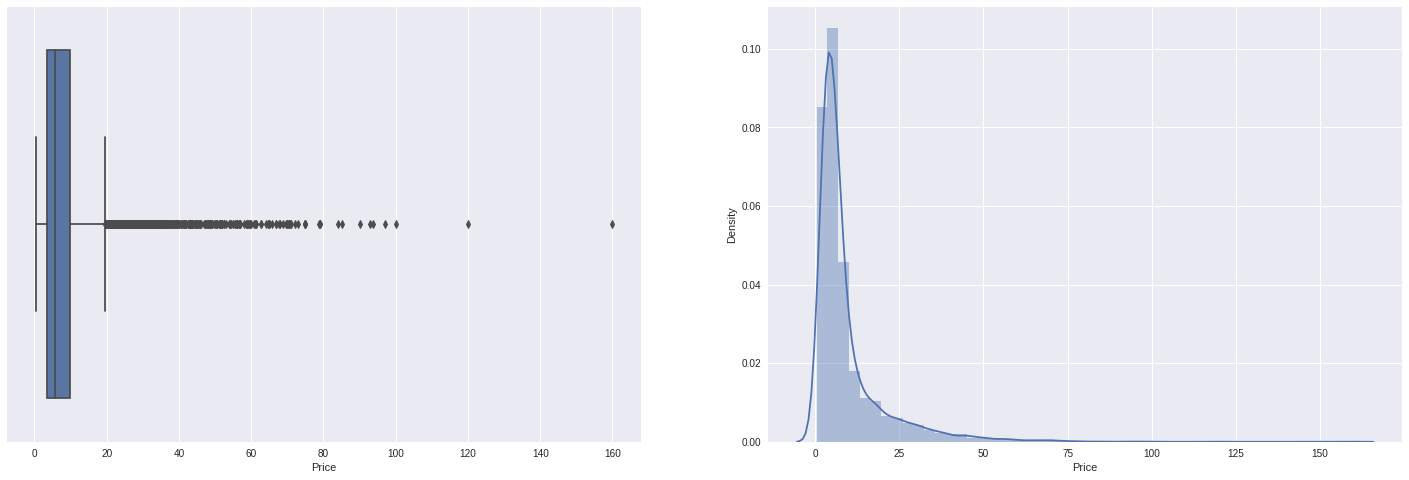

In [7]:
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,8)
sns.boxplot(data["Price"], ax=ax1)
sns.distplot(data["Price"],ax=ax2)

#Categorical Variable

##Categorical Variable 변수 수정



 ### 1.`Company` <br>
 : Name변수 앞에 명시된 회사 상호를 따로 모아 `Company`로 생성



In [8]:
data["Name"].value_counts()
#Name 앞에 회사 상호 명시됨. 개별적인 자동차에서 회사별로 분류 필요

Mahindra XUV500 W8 2WD                  49
Maruti Swift VDI                        45
Maruti Swift Dzire VDI                  34
Honda City 1.5 S MT                     34
Maruti Swift VDI BSIV                   31
                                        ..
Ford Figo Diesel EXI Option              1
Smart Fortwo CDI AT                      1
Skoda Fabia 1.4 TDI Active               1
Volkswagen Vento 1.2 TSI Highline AT     1
Skoda Yeti Elegance 4X2                  1
Name: Name, Length: 1876, dtype: int64

In [9]:
for i in range(data.shape[0]):
    data.at[i, 'Company'] = data['Name'][i].split()[0]


In [10]:
data.drop("Name",axis=1,inplace=True)

In [11]:
data["Company"].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Smart               1
Bentley             1
Lamborghini         1
Name: Company, dtype: int64

In [12]:
#모든 Categorical Variable
print("Location: ",data['Location'].unique())
print("Fuel_Type: ",data['Fuel_Type'].unique())
print("Transmission: ",data['Transmission'].unique())
print("Owner_Type: ",data['Owner_Type'].unique())
print("Company: ",data['Company'].unique())

Location:  ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel_Type:  ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission:  ['Manual' 'Automatic']
Owner_Type:  ['First' 'Second' 'Fourth & Above' 'Third']
Company:  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


# Numerical Variable

##Numerical Variable 변수 수정

### 1.`Unnamed:0` 삭제<br>
data에 `Unnamed:0`는 row 인덱스 값과 동일 -> 삭제

In [13]:
data.drop("Unnamed: 0",axis=1,inplace=True)

### 2.`New_Price` 삭제<br>
`New_Price`는 NULL값 많음 -> 삭제


In [14]:
data.drop("New_Price",axis=1,inplace=True)

### 3.`Mileage`,`Engine`,`Power`,`Seats`

`Mileage`,`Engine`,`Power` : 문자형 값 -> 숫자형

In [15]:
print("Engine type: ",type(data["Engine"][1]))
print("Mileage type: ",type(data["Mileage"][1]))
print("Power type: ",type(data["Power"][1]))
print("Seats type: ",type(data["Seats"][1]))

Engine type:  <class 'str'>
Mileage type:  <class 'str'>
Power type:  <class 'str'>
Seats type:  <class 'numpy.float64'>


In [16]:
import re

data['Engine']=data['Engine'].str.replace(r'\D+','') #Engine 값 뒤에 단위 'CC' 삭제
data['Engine'] = data['Engine'].astype(float) #Engine column 값을 str형에서 float형으로

data['Mileage']=data['Mileage'].str.replace(r'\D+','') #Mileage 값 뒤에 단위 'km/kg & km/l' 삭제
data['Mileage']=data['Mileage'].astype('float') #Mileage column 값을 str형에서 float형으로


data['Power']=data['Power'].apply(str).str.replace(r'\D+','') #Power 값 뒤에 단위 'bhp' 삭제
data['Power'] = pd.to_numeric(data['Power'],errors='coerce') #Power column 값을 str형에서 float형으로


`Mileage`,`Engine`,`Power`,`Seats`의 결측치는 평균값으로 대체

In [17]:

data['Engine']= data['Engine'].fillna((data['Engine'].mean()))
data['Mileage']= data['Mileage'].fillna((data['Mileage'].mean()))
data['Seats']= data['Seats'].fillna((data['Seats'].mean()))
data['Seats']=data['Seats'].astype('int')
data['Power']= data['Power'].fillna((data['Power'].mean()))


### 4.`Kilometer_Driven` 이상치 제거<br>

In [18]:
data=data.drop(data[data['Kilometers_Driven'] >= 600000].index, axis=0)




###  5.`Year`->`Used_Year`<br>
=> 현재 년도 - 차를 산 당시 년도=사용년도



In [19]:
import datetime
curr_date=datetime.datetime.now()
data["Used_Year"]=data["Year"].apply(lambda x: curr_date.year-x) #사용 년도 = 현재 년도 - 차를 산 당시 년도
data.drop(["Year"],axis=1,inplace=True) #기존의 year 변수 (차를 산 당시 년도) 삭제



#변수간의 관계

In [20]:
features =['Company','Location','Used_Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']
num_fea=['Used_Year','Kilometers_Driven','Mileage','Engine','Power','Seats']
cat_fea=['Company','Location','Fuel_Type','Transmission','Owner_Type']
target = 'Price'

##Categorical variable 분석



*  Maruti가 가장 인기있는 브랜드
*   diesel과 petrol의 fuel type 동일
*   Manual 방식의 transmission 많이 사용됨
* First와 Second ownership인 경우가 많음



Text(0.5, 1.0, 'Company 분포')

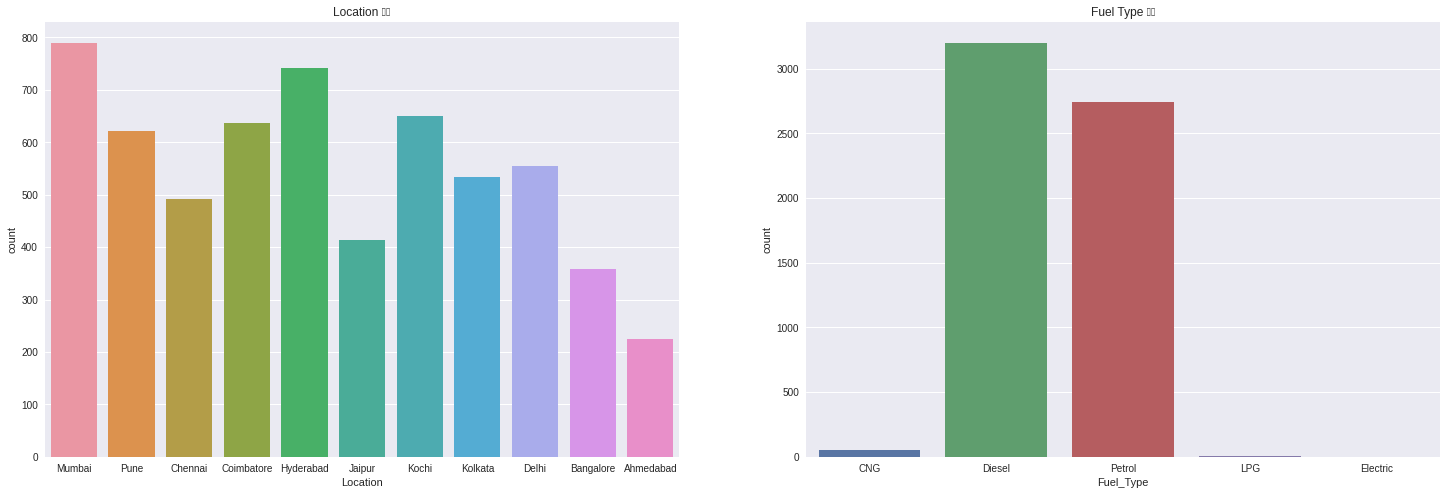

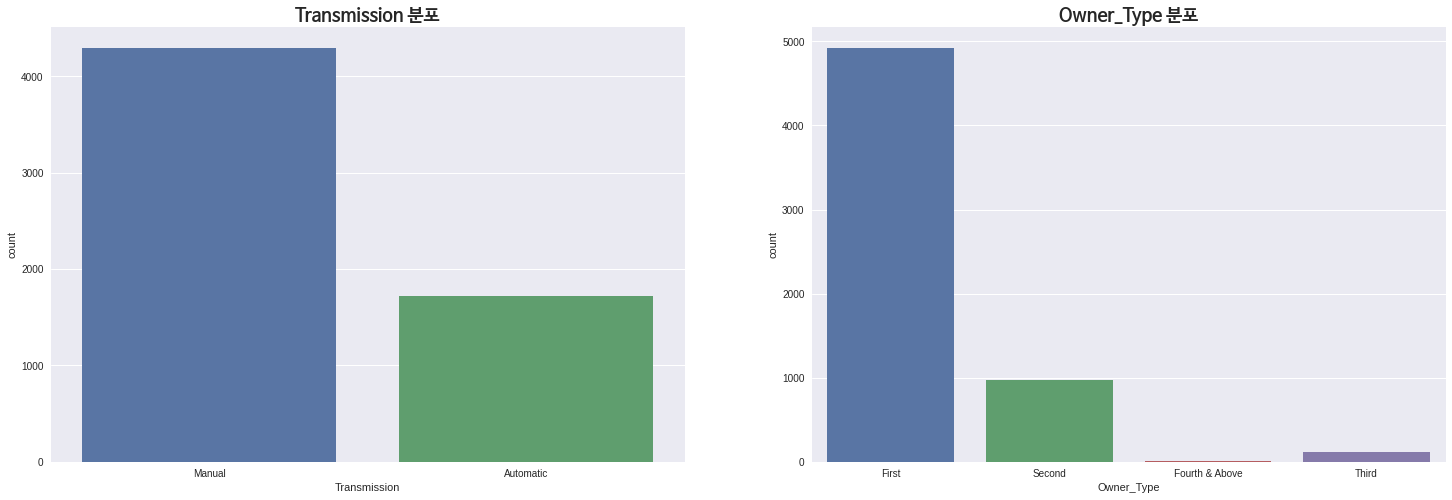

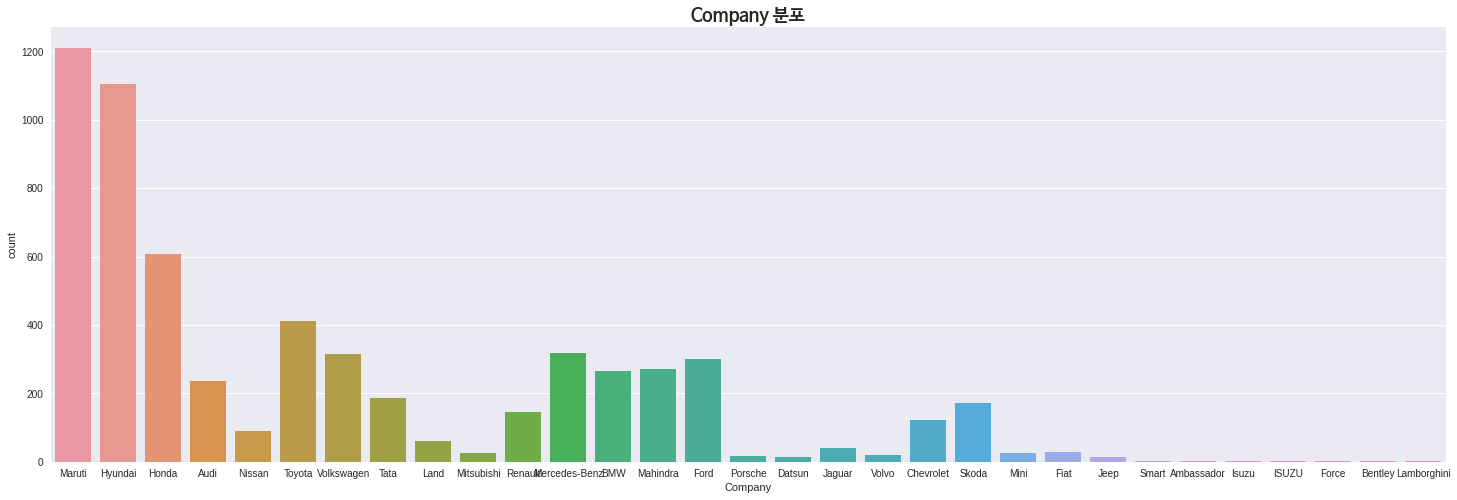

In [21]:
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,8)


fig1=sns.countplot(x='Location', data=data,ax=ax1)
fig1.set_title("Location 분포")

fig2=sns.countplot(x="Fuel_Type", data=data,ax=ax2)
fig2.set_title("Fuel Type 분포")

fig,(ax3,ax4)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,8)
fig3=sns.countplot(x='Transmission', data=data,ax=ax3)
fig3.set_title("Transmission 분포",fontsize=30,fontproperties=fontprop)


fig4=sns.countplot(x='Owner_Type', data=data,ax=ax4)
fig4.set_title("Owner_Type 분포",fontsize=30,fontproperties=fontprop)

fig,(ax6)= plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(25,8)
fig6=sns.countplot(x='Company', data=data,ax=ax6)
fig6.set_title("Company 분포",fontsize=30,fontproperties=fontprop)

Text(0.5, 1.0, 'Used_Year과 Price의 관계')

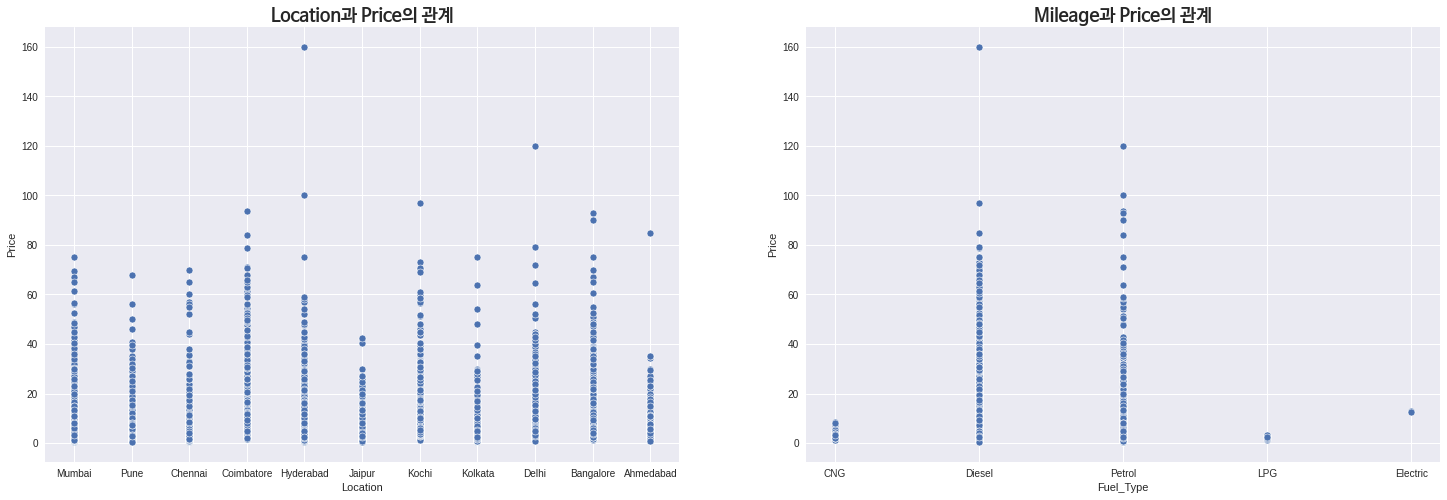

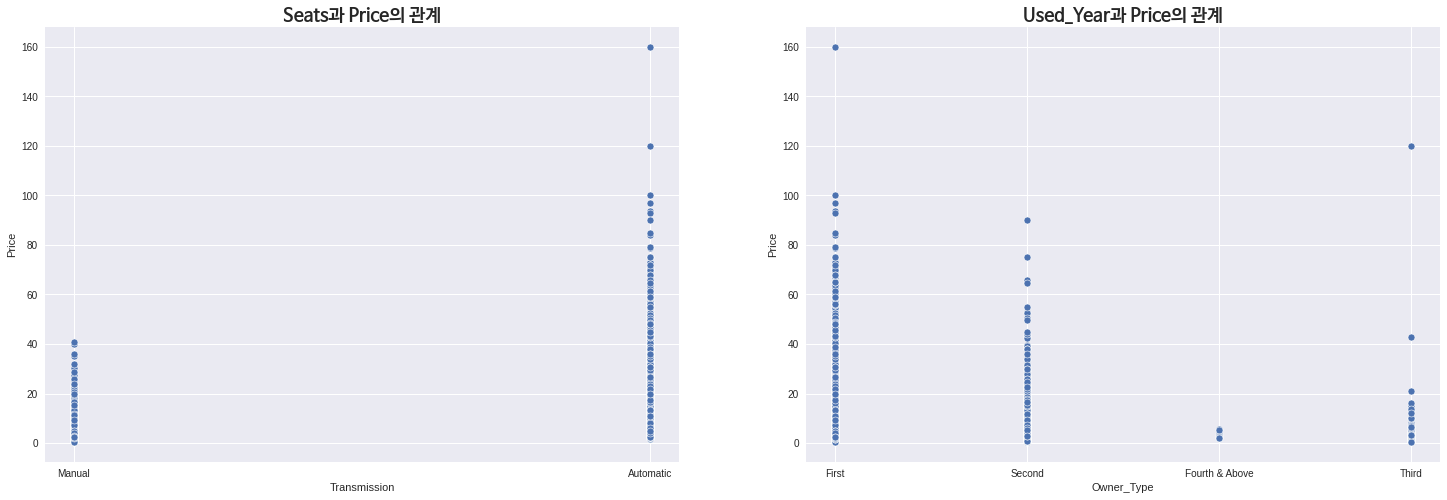

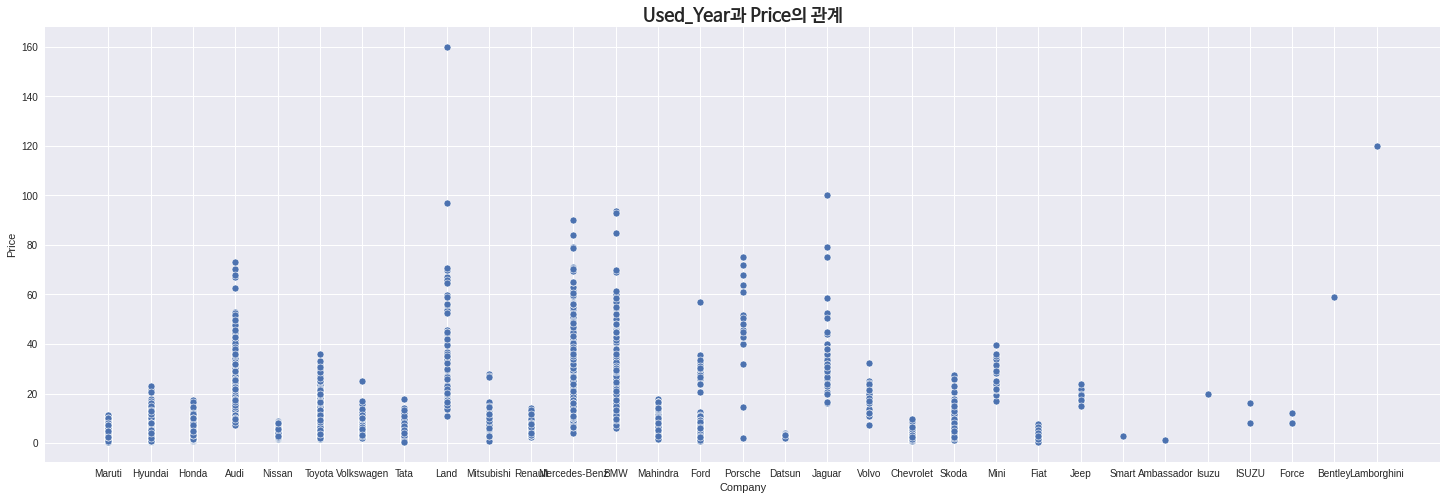

In [22]:
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,8)


fig1=sns.scatterplot(x='Location',y="Price",data=data,ax=ax1)
fig1.set_title("Location과 Price의 관계",fontsize=30,fontproperties=fontprop)

fig2=sns.scatterplot(x="Fuel_Type", y="Price",data=data,ax=ax2)
fig2.set_title("Mileage과 Price의 관계",fontsize=30,fontproperties=fontprop)

fig,(ax3,ax4)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,8)


fig3=sns.scatterplot(x='Transmission',y="Price", data=data,ax=ax3)
fig3.set_title("Seats과 Price의 관계",fontsize=30,fontproperties=fontprop)

fig4=sns.scatterplot(x='Owner_Type',y="Price", data=data,ax=ax4)
fig4.set_title("Used_Year과 Price의 관계",fontsize=30,fontproperties=fontprop)

fig,(ax6)= plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(25,8)
fig6=sns.scatterplot(x='Company',y="Price", data=data,ax=ax6)
fig6.set_title("Used_Year과 Price의 관계",fontsize=30,fontproperties=fontprop)

##Numerical Variable 분석

In [ ]:
# correlation matrix 
data[num_fea].corr()

,Used_Year,Kilometers_Driven,Mileage,Engine,Power,Seats
Used_Year,1.000000,0.481456,-0.198080,0.052322,-0.158181,-0.015184
Kilometers_Driven,0.481456,1.000000,-0.065126,0.167621,-0.104424,0.229683
Mileage,-0.198080,-0.065126,1.000000,-0.020358,0.130665,-0.020005
Engine,0.052322,0.167621,-0.020358,1.000000,0.050629,0.393317
Power,-0.158181,-0.104424,0.130665,0.050629,1.000000,-0.105708
Seats,-0.015184,0.229683,-0.020005,0.393317,-0.105708,1.000000


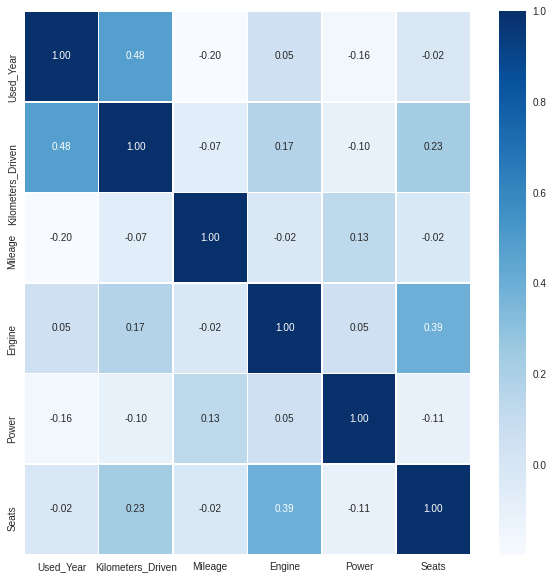

In [ ]:
# heatmap : correlation matrix 시각화 
plt.figure(figsize=(10,10))
sns.heatmap(data = data[num_fea].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data[num_fea].values, i) for i in range(data[num_fea].shape[1])]
vif["features"] = data[num_fea].columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
5,15.689484,Seats
3,10.044462,Engine
0,7.460705,Used_Year
1,5.055288,Kilometers_Driven
2,2.009374,Mileage
4,1.333174,Power


* 다중공선성 의심 변수 : Seats, Engine
* 다중공선성이 의심가는 변수를 제거해 가며 모델 판단 해보려고 함

In [ ]:
X2 = data[num_fea].drop(['Seats'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,6.241902,Used_Year
3,5.216021,Engine
1,4.940950,Kilometers_Driven
2,1.824925,Mileage
4,1.327924,Power


#Feature Engineering

##`Price`
한 쪽으로 치우진 값을 log transform 시켜줌

In [ ]:
Price = data["Price"]
Price = pd.get_dummies(Price,drop_first=True)
data["Price"]=np.log1p(data["Price"].values)
data_Y=pd.concat([data,Price],axis=1)

data_Y["Price"].head()

0    1.011601
1    2.602690
2    1.704748
3    1.945910
4    2.930660
Name: Price, dtype: float64

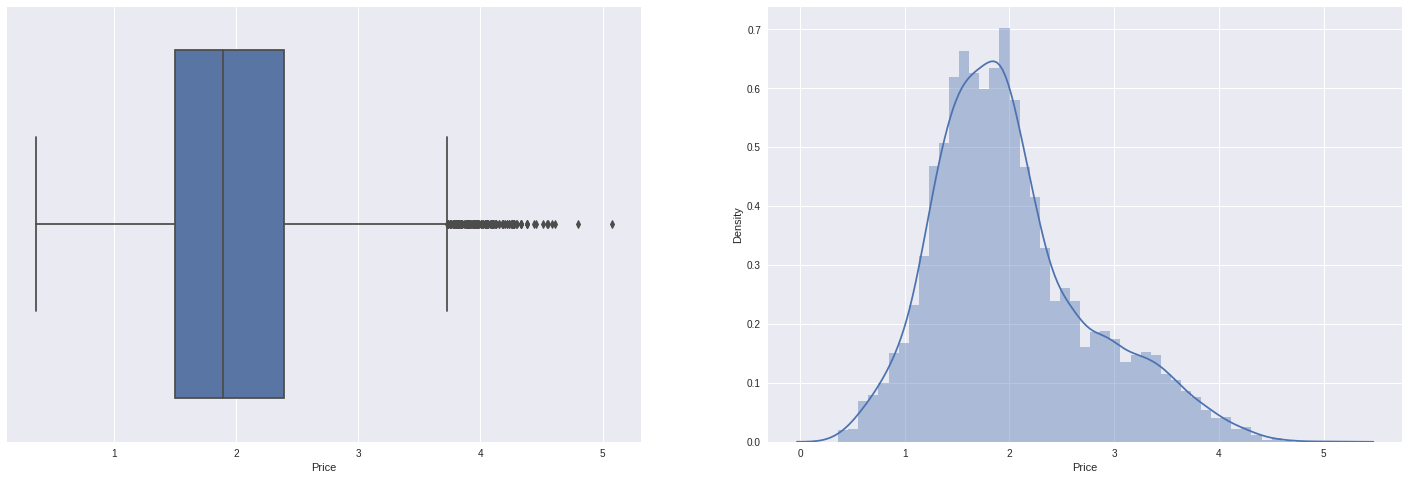

In [ ]:
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,8)
sns.boxplot(data_Y["Price"], ax=ax1)
sns.distplot(data_Y["Price"],ax=ax2)

##`Location`,`Fuel_Type`,`Transmission`,`Owner_Type`, `Company`
str 형태로 분류형 자료값을 수치형으로 바꿔줌

In [ ]:
data_X=data

Location = data["Location"]
Location = pd.get_dummies(Location,drop_first=True)
Fuel_Type = data["Fuel_Type"]
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)
Transmission = data["Transmission"]
Transmission = pd.get_dummies(Transmission,drop_first=True)
data_X=data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=False)
Company = data["Company"]
Company = pd.get_dummies(Company,drop_first=True)


data_X=pd.concat([data_X,Location,Fuel_Type,Transmission,Company],axis=1)
data_X.drop(["Location","Fuel_Type","Transmission","Company"],axis=1,inplace=True)
data_X.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Used_Year,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol,Manual,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,72000,1,266.0,998.0,5816.0,5,1.011601,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,41000,1,1967.0,1582.0,1262.0,5,2.602690,6,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,1,182.0,1199.0,887.0,5,1.704748,10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,1,2077.0,1248.0,8876.0,7,1.945910,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,40670,2,152.0,1968.0,1408.0,5,2.930660,8,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_X2=pd.concat([X2,Location,Fuel_Type,Transmission,Company],axis=1)
data_X2
#다중공선성 의심변수 Seat을 제외한 dataframe

,Used_Year,Kilometers_Driven,Mileage,Engine,Power,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol,Manual,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,11,72000,266.0,998.0,5816.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,6,41000,1967.0,1582.0,1262.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10,46000,182.0,1199.0,887.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,87000,2077.0,1248.0,8876.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,8,40670,152.0,1968.0,1408.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,7,27365,284.0,1248.0,74.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6015,6,100000,244.0,1120.0,71.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6016,9,55000,140.0,2498.0,112.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6017,8,46000,189.0,998.0,671.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0




##set X and Y



In [ ]:
data_Y=data_Y["Price"]
data_X.drop(["Price"],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = 0.2, random_state = 25)

#모델 가져오기
lin_reg= LinearRegression()
#fit train data
lin_reg.fit(X_train, y_train)

# predict y
y_pred= lin_reg.predict(X_train)

# fit된 모델의 R-square
print("R-square of train model: ",lin_reg.score(X_train,y_train))

# fit된 모델의 MSE
print("Mean Squard Error of train model:",mean_squared_error(y_train, y_pred))

#회귀계수
print("coefficients :",lin_reg.coef_) 
print("intercept: ",lin_reg.intercept_)

# test data R-square
print("R-square of test data: ",lin_reg.score(X_test, y_test))

#Accuaracy
print("Accuracy on Traing set: ",lin_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",lin_reg.score(X_test,y_test))

R-square of train model:  0.918088895568606
Mean Squard Error of train model: 0.04517261739346733
coefficients : [-1.27095514e-06 -4.13962998e-02  6.84114903e-06  4.93369270e-04
  3.93411369e-06  3.31927664e-02 -9.52511197e-02  1.17439778e-01
  3.28824809e-02  8.50388212e-02 -6.55522977e-02  7.82640071e-02
 -4.07736922e-02 -2.20511164e-02 -2.05452711e-01 -3.73390880e-02
 -3.41945675e-02  2.29292963e-01  1.11239721e+00  3.81127168e-02
  9.77619225e-02 -1.54705105e-01  6.15384198e-01  6.67718360e-01
  5.37653255e-13 -2.80471553e-01 -5.09500357e-01 -2.00072965e-01
 -1.44055042e-02 -1.52645440e-01 -1.37627688e-02 -4.70555329e-02
 -1.52764691e-01 -2.43891549e-01  7.96377741e-01  4.26102398e-01
  1.42755457e+00  8.98843048e-01 -2.14674016e-01 -7.33548396e-02
  6.71430385e-01  9.61270045e-01  6.47345263e-02 -1.30503490e-01
  8.60064170e-01 -1.16521278e-01 -1.31530872e-02  3.87326525e-01
 -4.40082543e-01  4.98379526e-02 -9.58379295e-02  5.05907637e-01]
intercept:  1.7844675019873584
R-square o

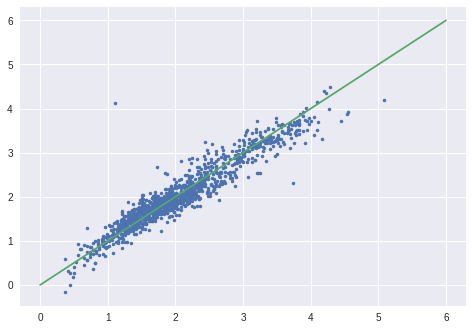

In [ ]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, lin_reg.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 6, 6)
y = x
plt.plot(x, y)
plt.show()

다중공선성 의심 변수 제거한 데이터로 linear regression <br>
결과 간에 큰 차이없음 그러나 학습해야 할 feature의 갯수가 줄어듦

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data_X2, data_Y, test_size = 0.2, random_state = 25)

#모델 가져오기
lin_reg= LinearRegression()
#fit train data
lin_reg.fit(X_train, y_train)

# predict y
y_pred= lin_reg.predict(X_train)

# fit된 모델의 R-square
print("R-square of train model: ",lin_reg.score(X_train,y_train))

# fit된 모델의 MSE
print("Mean Squard Error of train model:",mean_squared_error(y_train, y_pred))

#회귀계수
print("coefficients :",lin_reg.coef_) 
print("intercept: ",lin_reg.intercept_)

# test data R-square
print("R-square of test data: ",lin_reg.score(X_test, y_test))

#Accuaracy
print("Accuracy on Traing set: ",lin_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",lin_reg.score(X_test,y_test))

R-square of train model:  0.9170035418773057
Mean Squard Error of train model: 0.04577117197741584
coefficients : [-9.77809993e-02 -1.24978697e-06  7.02760731e-06  5.11068275e-04
  3.62089634e-06  1.10474124e-01  2.73414665e-02  8.50938919e-02
 -6.53174295e-02  8.36731089e-02 -4.39280321e-02 -2.16121896e-02
 -2.00168573e-01 -3.51600910e-02 -3.94532510e-02  2.41416241e-01
  1.10177388e+00  4.87529077e-02  1.03011560e-01 -1.51066199e-01
  6.58254344e-01  6.97500102e-01 -2.28317920e-11 -2.22063259e-01
 -4.27876981e-01 -1.50630594e-01  9.24417675e-02 -1.02842420e-01
  3.89657969e-02  6.99536217e-03 -1.30199682e-01 -1.49285562e-01
  8.20886311e-01  4.60268403e-01  1.24835410e+00  9.35892939e-01
 -1.15917015e-01 -1.27870353e-02  7.06033874e-01  9.85896586e-01
  1.28849634e-01 -8.17968332e-02  8.45496359e-01 -6.49527969e-02
  3.46420159e-02  3.32348072e-01 -3.88173717e-01  1.29139137e-01
 -4.67038382e-02  5.44711143e-01]
intercept:  1.8335991506456164
R-square of test data:  0.900846036487455

#Ridge Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = 0.2, random_state = 25)

rid = Ridge(alpha=1.0) # alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
rid.fit(X_train, y_train)
# predict y
y_pred= rid.predict(X_train)
# fit된 모델의 R-square
print("R-square of train model: ",rid.score(X_train,y_train))

# fit된 모델의 MSE
print("Mean Squard Error of train model:",mean_squared_error(y_train, y_pred))

#회귀계수
print("coefficients :",rid.coef_) 
print("intercept: ",rid.intercept_)

# test data R-square
print("R-square of test data: ",rid.score(X_test, y_test))

#Accuaracy
print("Accuracy on Traing set: ",rid.score(X_train,y_train))
print("Accuracy on Testing set: ",rid.score(X_test,y_test))

R-square of train model:  0.9177004159021527
Mean Squard Error of train model: 0.045386857495095224
coefficients : [-1.28979473e-06 -4.01681696e-02  7.30361922e-06  5.03154937e-04
  3.83487032e-06  2.71860388e-02 -9.51742353e-02  1.16570592e-01
  3.24886808e-02  8.52306523e-02 -6.39602040e-02  7.87183569e-02
 -4.11105725e-02 -2.10347579e-02 -2.04846634e-01 -3.67887195e-02
 -3.44423934e-02  2.06819135e-01  7.21724087e-01  1.56155804e-02
  7.39415199e-02 -1.62552860e-01  4.29924978e-01  4.79593987e-01
  0.00000000e+00 -4.42328727e-01 -6.08292518e-01 -3.52002322e-01
 -1.32711318e-01 -3.20422353e-01 -1.82916661e-01 -2.14441644e-01
 -1.65907127e-01 -2.10619907e-01  5.89440959e-01  2.34218930e-01
  5.96463223e-01  6.99173775e-01 -3.75056790e-01 -2.39042632e-01
  4.84636239e-01  7.43680449e-01 -1.03997993e-01 -2.96349233e-01
  6.07638630e-01 -2.81940593e-01 -1.86970960e-01  9.96795305e-02
 -6.02726947e-01 -1.18445598e-01 -2.64665108e-01  3.05435159e-01]
intercept:  1.9981079847517063
R-square

#Lasso Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = 0.2, random_state = 25)

# Lasso R-square
las=Lasso(alpha=0.3)
las.fit(X_train, y_train)
# predict y
y_pred= las.predict(X_train)
# fit된 모델의 R-square
print("R-square of train model: ",las.score(X_train,y_train))
# fit된 모델의 MSE
print("Mean Squard Error of train model:",mean_squared_error(y_train, y_pred))
#회귀계수
print("coefficients :",las.coef_) 
print("intercept: ",las.intercept_)
# test data R-square
print("R-square of test data: ",las.score(X_test, y_test))

#Accuaracy
print("Accuracy on Traing set: ",las.score(X_train,y_train))
print("Accuracy on Testing set: ",las.score(X_test,y_test))


R-square of train model:  0.7440759411662656
Mean Squard Error of train model: 0.14113787955529766
coefficients : [-3.77573332e-06 -0.00000000e+00  7.57887277e-05  9.13310753e-04
  1.28255933e-05 -0.00000000e+00 -6.27780128e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]
intercept:  1.1318967059956648
R-square 

#RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = 0.2, random_state = 25)

rf_reg= RandomForestRegressor(random_state=11)
rf_reg.fit(X_train,y_train)

# predict y
rf_y_pred= rf_reg.predict(X_train)

# fit된 모델의 R-square
print("R-square of train model: ",rf_reg.score(X_train,y_train))

# fit된 모델의 MSE
print("Mean Squard Error of train model:",mean_squared_error(y_train, y_pred))


# test data R-square
print("R-square of test data: ",rf_reg.score(X_test, y_test))

#Accuaracy
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))



R-square of train model:  0.9914717318025298
Mean Squard Error of train model: 0.14113787955529766
R-square of test data:  0.918363344141864
Accuracy on Traing set:  0.9914717318025298
Accuracy on Testing set:  0.918363344141864
